In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv("C:/Users/simon/OneDrive/Documents/CUA COURSES/ENGR 441 & 442/Prototype 2/MASTER DATAFRAME/MASTER_system_and_weather.csv")

In [5]:
X = df[['System Size (kW)', 'Solar_Irradiance', 'Temperature_2m', 'Cloud_Cover']]
y = df['Generated (kWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
ann_model = MLPRegressor(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', max_iter=4000, random_state=42)

In [11]:
ann_model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(200, 100), max_iter=4000, random_state=42)

In [15]:
cv_scores = cross_val_score(ann_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.92158699 0.91263985 0.85648175 0.85637371 0.79037556]


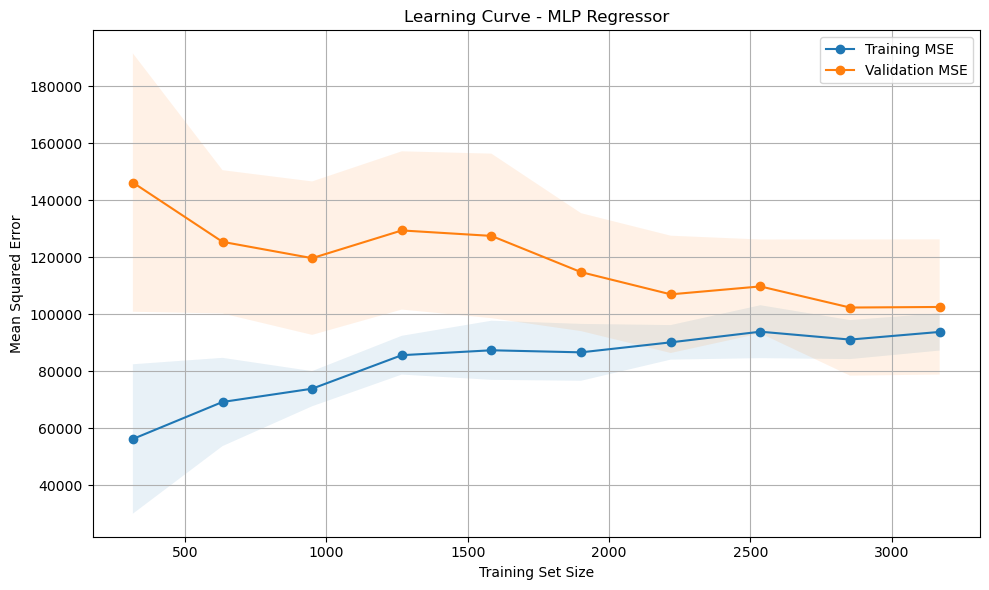

In [27]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=ann_model,
    X=X,
    y=y,
    cv=5,
    scoring='neg_mean_squared_error',  
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training MSE')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation MSE')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1)
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1)
plt.title("Learning Curve - MLP Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

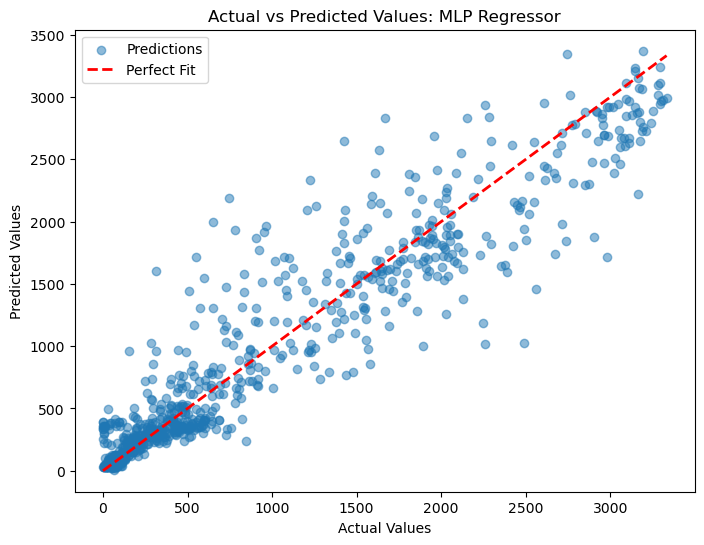

In [29]:
y_pred_ann = ann_model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: MLP Regressor")
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
mae = mean_absolute_error(y_test, y_pred_ann)

print(f"ANN Test Set MSE: {rmse_ann}")
print(f"ANN Test Set MAE: {mae}")
print(f"ANN Test Set R-squared: {r2_ann}")

ANN Test Set MSE: 101581.47643238353
ANN Test Set MAE: 205.57197105106206
ANN Test Set R-squared: 0.8903504449269486


In [55]:
hidden_layer_configs = [
    (100,),          
    (200, 100),      
    (50, 50),        
    (150, 100, 50),  
    (250,),          
    (100, 50)        
]

r2_scores = []
mse_values = []
best_model = None
best_score = float('-inf')
best_config = None

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through each configuration
for config in hidden_layer_configs:
    # Create and train the model
    model = MLPRegressor(hidden_layer_sizes=config, activation='relu', solver='adam', max_iter=4000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Calculate R-squared and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2_scores.append(r2)
    mse_values.append(mse)
    
    # Print results
    print(f"Hidden Layer Configuration: {config}")
    print(f"  R-squared: {r2}")
    print(f"  MSE: {mse}")
    
    # Update the best model
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_config = config

# Print
print("\nBest Model Configuration:")
print(f"  Hidden Layer Sizes: {best_config}")
print(f"  R-squared: {best_score}")

Hidden Layer Configuration: (100,)
  R-squared: 0.8825009369000386
  MSE: 108853.41305000255
Hidden Layer Configuration: (200, 100)
  R-squared: 0.8811098481813954
  MSE: 110142.14464398005
Hidden Layer Configuration: (50, 50)
  R-squared: 0.8910123064346909
  MSE: 100968.31508297878
Hidden Layer Configuration: (150, 100, 50)
  R-squared: 0.8890444244184675
  MSE: 102791.39918504849
Hidden Layer Configuration: (250,)
  R-squared: 0.8857950602850277
  MSE: 105801.67319775511
Hidden Layer Configuration: (100, 50)
  R-squared: 0.8882462164021163
  MSE: 103530.87458690582

Best Model Configuration:
  Hidden Layer Sizes: (50, 50)
  R-squared: 0.8910123064346909


In [57]:
import joblib

joblib.dump(ann_model, 'MLP_Regressor.pkl')

['MLP_Regressor.pkl']